In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.1.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.1372932 ,  0.8283029 ,  0.01440598,  0.20898534,  0.22969244,
         0.28499743,  0.35054701,  0.37942757,  0.59582868, -0.48556912]])

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.08445791, 0.16855516, 0.07469149, 0.09073521, 0.09263366,
        0.09790108, 0.10453345, 0.10759645, 0.13359179, 0.0453038 ]])

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.3237977027893066

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
fit_result = model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0418 - accuracy: 0.9861
Epoch 2/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0391 - accuracy: 0.9866
Epoch 3/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0357 - accuracy: 0.9877
Epoch 4/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0338 - accuracy: 0.9890
Epoch 5/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0330 - accuracy: 0.9886
Epoch 6/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0317 - accuracy: 0.9892
Epoch 7/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0295 - accuracy: 0.9903
Epoch 8/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0277 - accuracy: 0.9901
Epoch 9/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0274 - accuracy: 0.9906
Epoch

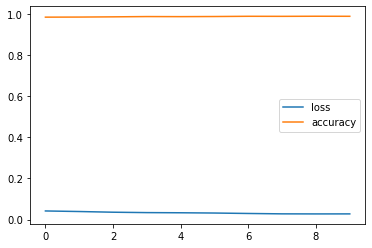

In [13]:
plt.plot(fit_result.history['loss'], label='loss')
plt.plot(fit_result.history['accuracy'], label='accuracy')
plt.legend()

In [14]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 0.0786 - accuracy: 0.9807


[0.07857174890264751, 0.9807]

In [15]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [22]:
probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float64, numpy=
array([[1.38757433e-10, 2.03103652e-12, 1.55601286e-10, 3.97384424e-06,
        4.51670119e-13, 1.93911467e-10, 7.29899732e-15, 9.99995864e-01,
        5.53035492e-11, 1.61692705e-07]])>

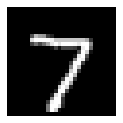

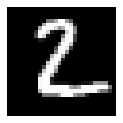

In [30]:
for x in range(2):
    
    sample_image = np.array(x_test[x]) 
    sample_image = sample_image.reshape(28,28)
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.imshow(sample_image, cmap = 'gray')
    